# Analysis of  English phonemes

Hello, my name is Joshith. I am a senior at IIT Guwahati pursuing my bachelor in Electronics and communication engineering

In this tutorial we will be analysing 8 phonemes of English language by plotting time-domain signal, DFT and spectrograms of phonems.

Phonemes are the smallest units of sound in a language that can distinguish one word from another. In English, there are around 44 phonemes, including vowel sounds like "a", "e", "i", "o", "u", and consonant sounds like "p", "b", "t", "d", "k", "g". These phonemes combine to form words and are essential for understanding and producing spoken language.

in this tutorial we will be looking at /s/, /t/, /v/, /w/, /j/, /e/, /i/, /aI/ 

In [82]:
import os
import matplotlib
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
from ipywidgets import interact, fixed, FloatSlider
import IPython.display as ipd

### Loading files


In [83]:
# Define base folder for recordings
BASE_FOLDER = "D:/Acads/8th sem/computing with signals/recording"

# Define filenames
filenames = ["s.wav", "t.wav", "v.wav", "w.wav", "j.wav", "e.wav", "i.wav", "aI.wav"]
data_name = ["/s/","/t/","/v/","/w/","/j/","/e/","/i/","/aI/" ] 

sr = 0


data = []
for filename in filenames:
    filepath = os.path.join(BASE_FOLDER, filename)
    x, y = librosa.load(filepath)
    sr = y
    data.append(x)


# Part I: Visualizing time domain representation
 

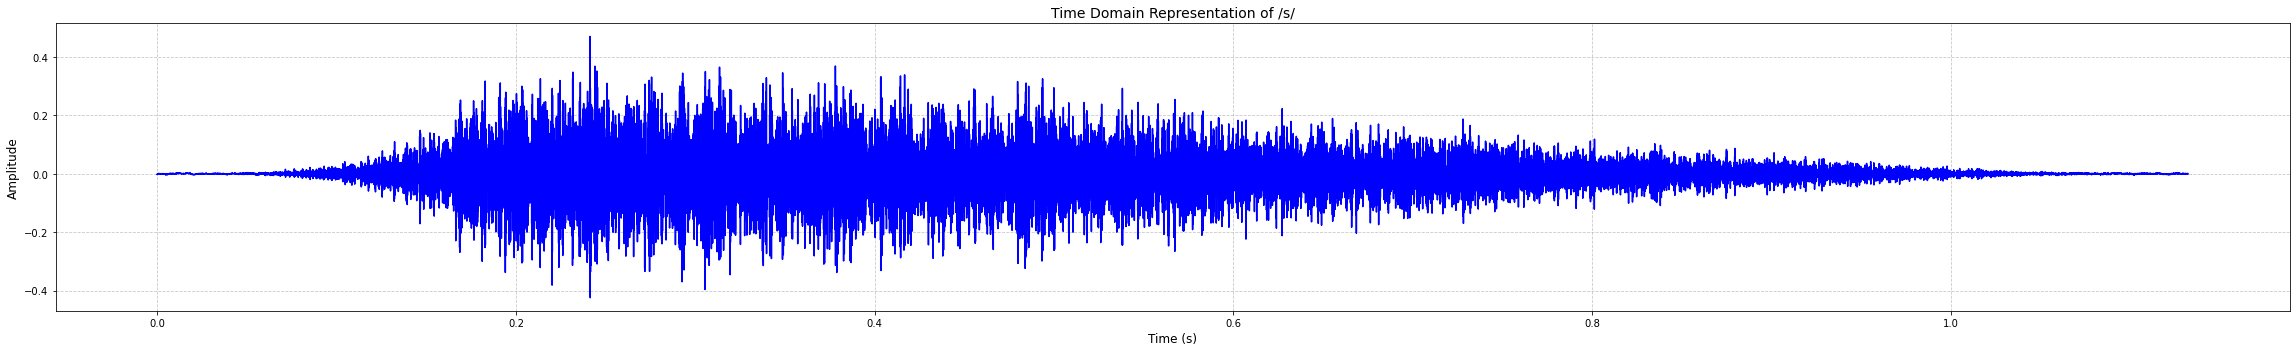

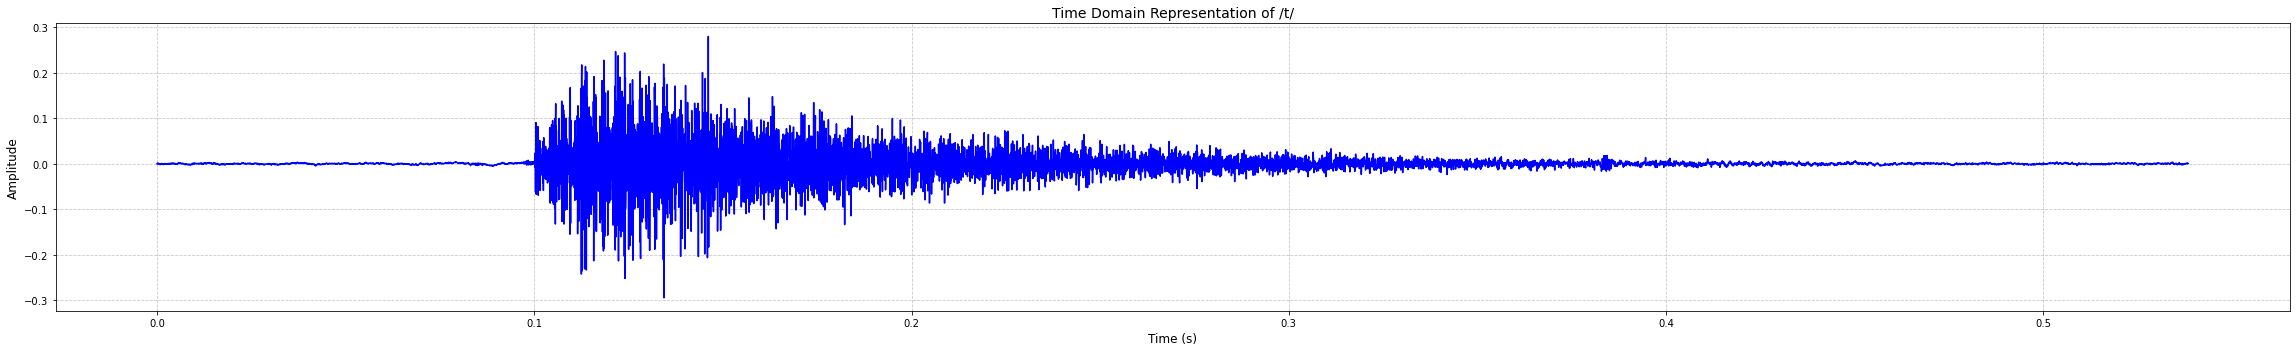

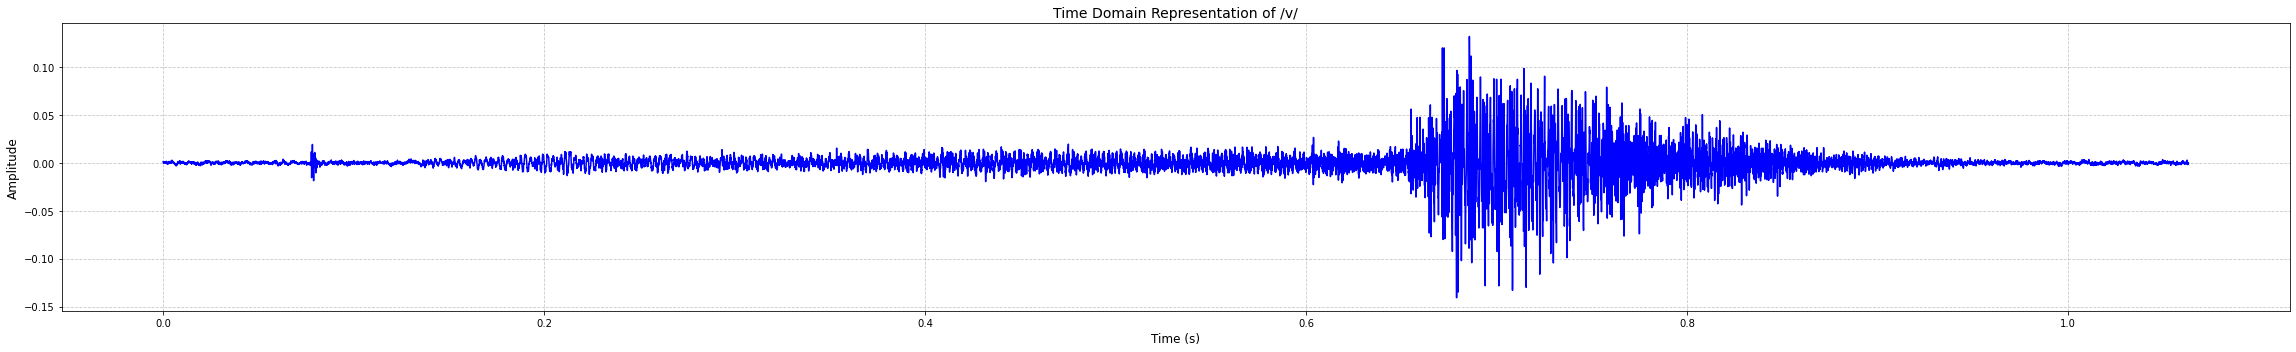

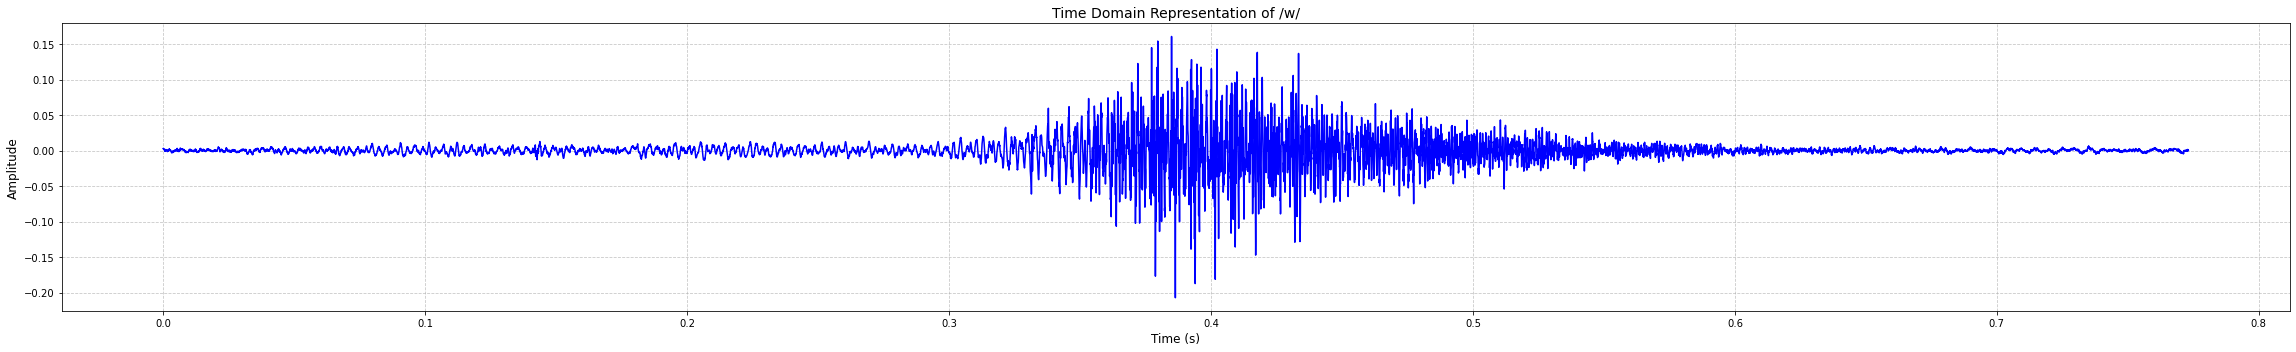

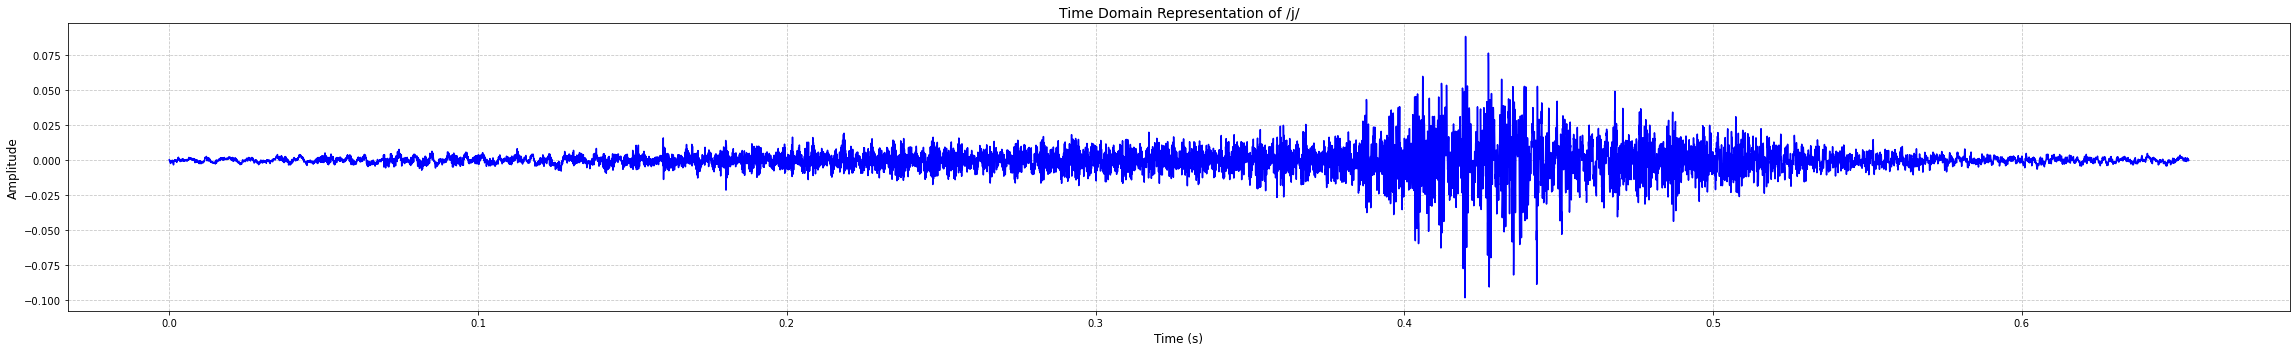

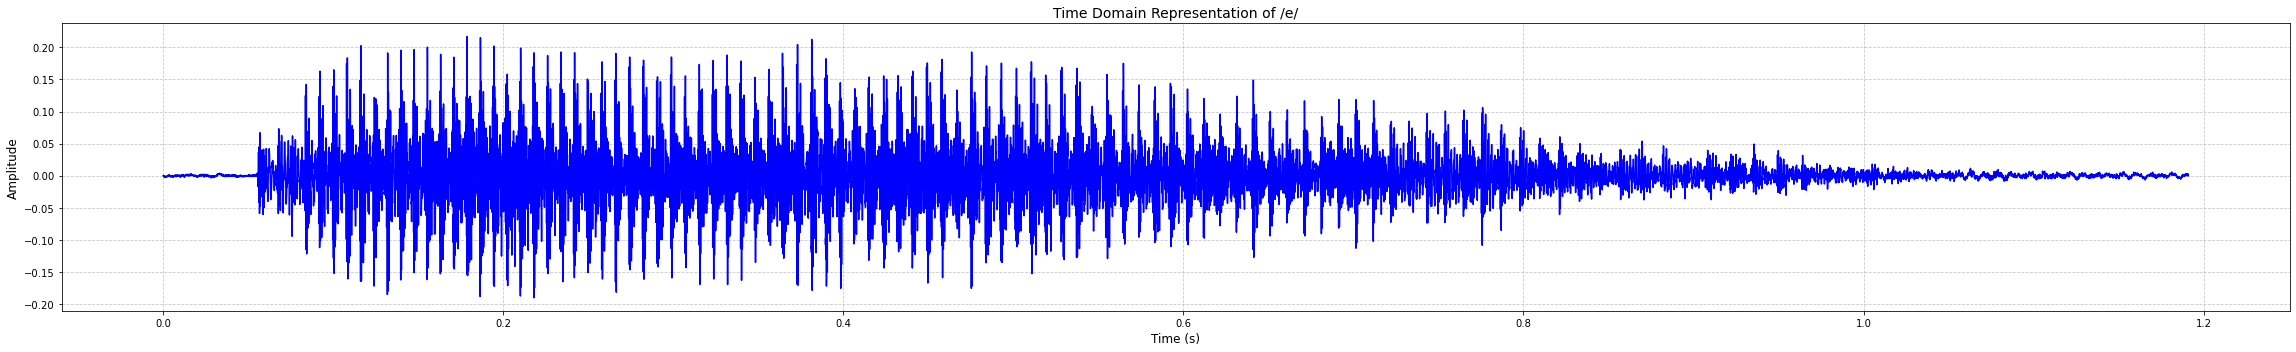

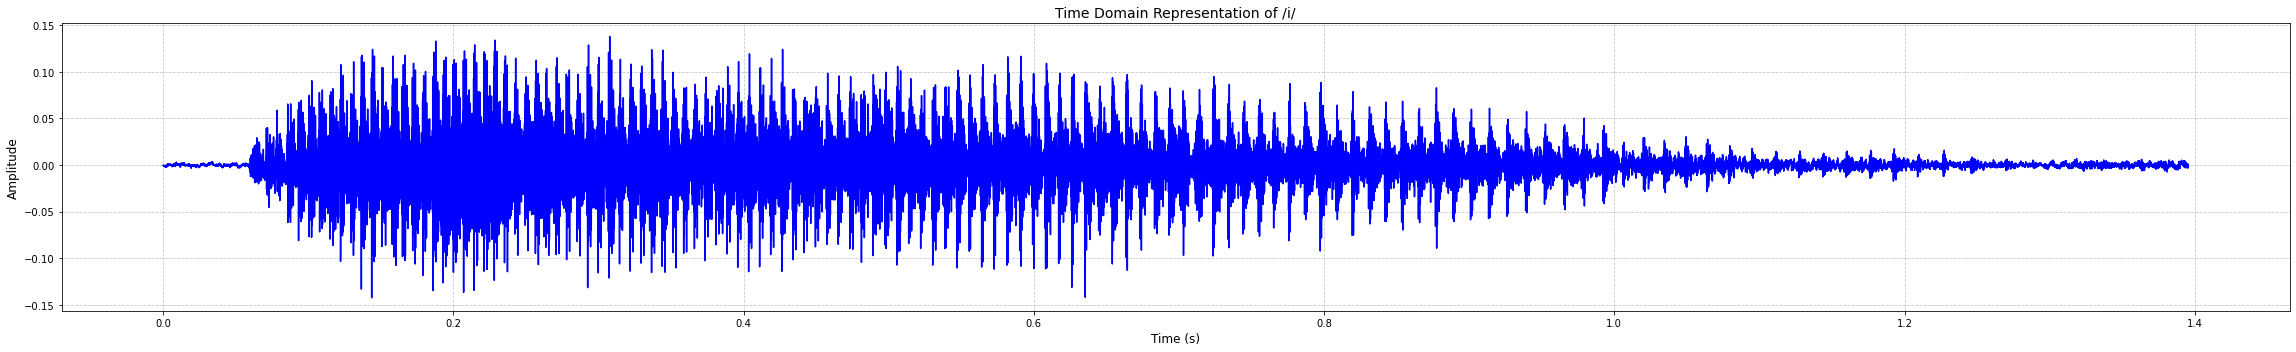

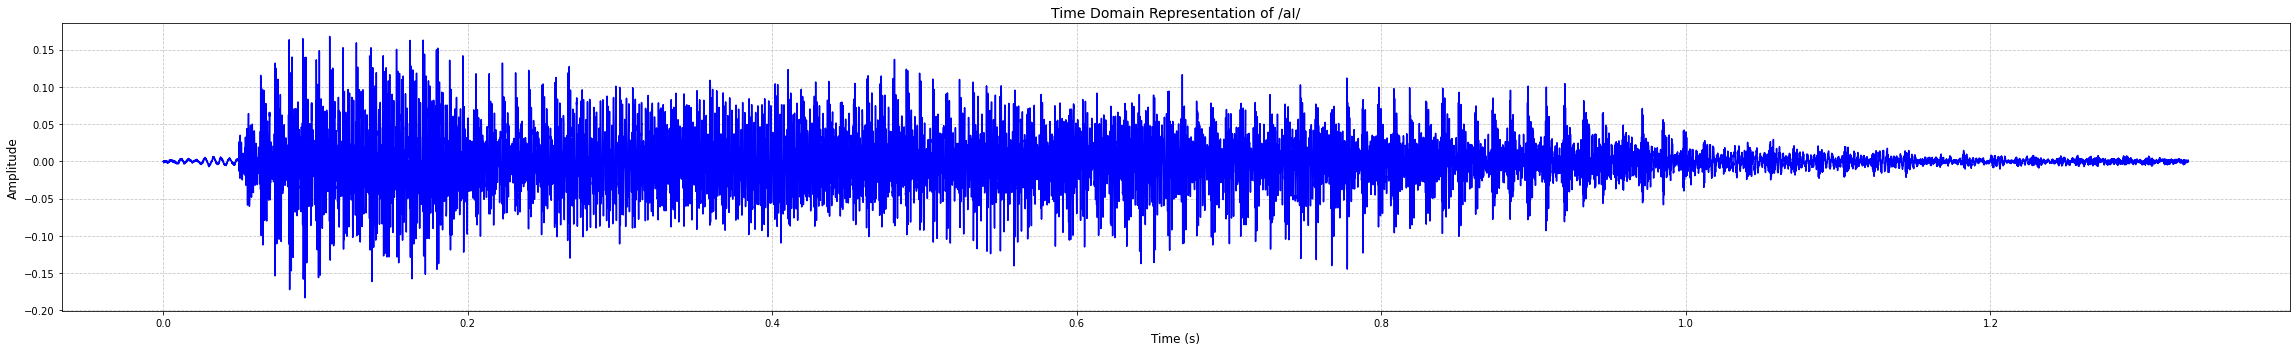

In [84]:
def plot_time_domain(X, phoneme, sr):
    time = np.arange(0, len(X) / sr, 1 / sr)

    plt.figure(figsize=(32, 5))
    plt.plot(time, X, color='b', linewidth=1.5)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.title("Time Domain Representation of " + phoneme, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

for i in range(8):
    plot_time_domain(data[i], data_name[i], sr)

# Part II : Visualizing Frequency spectrum

## Definition of DFT

Let $x\in \mathbb{C}^N$ be a vector of length $N\in\mathbb{N}$. In the speech context, $x$ can be interpreted as a discrete signal with samples $x(0), x(1), ..., x(N-1)$ representing samples of $S(t)$ sampled at a given sampling rate. The **discrete Fourier transform** (DFT) of $x$ is defined by:

$$ X(k) := \sum_{n=0}^{N-1} x(n) \exp(-2 \pi i k n / N) $$

for $k \in [0:N-1]$. The vector $X\in\mathbb{C}^N$ can be interpreted as frequency representation of the time-domain signal $x$.  

Each vector can be regarded as a sampled version of the exponential function of frequency $k/N$. Then, the DFT can be expressed as inner products



## DFT Matrix

Being a linear operator $\mathbb{C}^N \to \mathbb{C}^N$, the DFT can be expressed by some $N\times N$-matrix. This leads to the famous DFT matrix $\mathrm{DFT}_N \in \mathbb{C}^{N\times N}$ matrix, which is given by

$$\mathrm{DFT}_N(n, k) = \mathrm{exp}(-2 \pi i k n / N)$$

Let us follow the notation to represent the DFT matrix

$$ \sigma_N^{kn} = \mathrm{exp}(-2 \pi i / N)^{kn} = \mathrm{exp}(-2 \pi i k n / N)$$

From this, one obtains:

$$
\mathrm{DFT}_N =
\begin{pmatrix}
    1 & 1 & 1 & \dots  & 1 \\
    1 & \sigma_N & \sigma_N^2 & \dots  & \sigma_N^{N-1} \\
    1 & \sigma_N^2 & \sigma_N^4 & \dots  & \sigma_N^{2(N-1)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & \sigma_N^{N-1} & \sigma_N^{2(N-1)} & \dots  & \sigma_N^{(N-1)(N-1)} \\
\end{pmatrix}
$$


In [85]:
def generate_matrix_dft(N, K):

    dft = np.zeros((K, N), dtype=np.complex128)
    for n in range(N):
        for k in range(K):
            dft[k, n] = np.exp(-2j * np.pi * k * n / N)
    return dft


We now write a function that computes the discrete Fourier transform $X = \mathrm{DFT}_N \cdot x$:

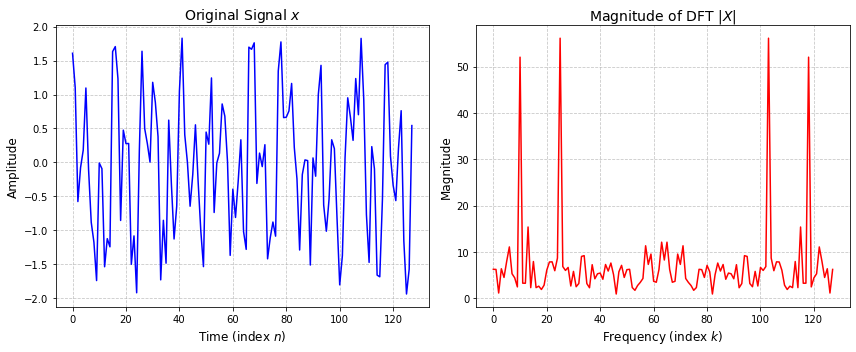

In [86]:
def dft(x):
    x = x.astype(np.complex128)
    N = len(x)
    dft_mat = generate_matrix_dft(N, N)  # Assuming generate_matrix_dft is defined elsewhere
    return np.dot(dft_mat, x)

# Define example parameters
N = 128
n = np.arange(N)
k1 = 10
k2 = 25
x = np.sin(2 * np.pi * (k1 * n / N) + 2 * (np.random.rand(N) - 0.5)) + np.cos(2 * np.pi * (k2 * n / N) + 2 * (np.random.rand(N) - 0.6))
X = dft(x)

# Plotting
plt.figure(figsize=(12, 5))

# Plot original signal
plt.subplot(1, 2, 1)
plt.plot(n, x, color='blue', linestyle='-', linewidth=1.5)
plt.title('Original Signal $x$', fontsize=14)
plt.xlabel('Time (index $n$)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Plot magnitude of DFT
plt.subplot(1, 2, 2)
plt.plot(np.abs(X), color='red', linestyle='-', linewidth=1.5)
plt.title('Magnitude of DFT $|X|$', fontsize=14)
plt.xlabel('Frequency (index $k$)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Computational Complexity

We won't be running the code for DFT as it is too slow for large inputs. More practical way to compute DFT is FFT

FFT reduces the overall number of operations from the order of $N^2$ (needed when computing the usual matrix&ndash;vector product $\mathrm{DFT}_N \cdot x$) to the order of $N\log_2N$. The savings are enormous.

## Fast Fourier Transform (FFT)

FFT is a divide and conquer algorithm

The FFT algorithm is based on the observation that applying a DFT of even size $N=2M$ can be expressed in terms of  applying two DFTs of half the size $M$. It exploits the fact that there are algebraic relations between the entries $\sigma_N^{kn} = \mathrm{exp}(-2 \pi i / N)^{kn}$ of DFT matrices. In particular, one has 

$$\sigma_M = \sigma_N^2$$

In the FFT algorithm, one computes the DFT of the even-indexed and the uneven-indexed entries of $x$:

\begin{align}
(A(0), \dots, A(N/2-1)) &= \mathrm{DFT}_{N/2} \cdot (x(0), x(2), x(4), \dots, x(N-2))\\
(B(0), \dots, B(N/2-1)) &= \mathrm{DFT}_{N/2} \cdot (x(1), x(3), x(5), \dots, x(N-1))
\end{align}

With these two DFTs of size $N/2$, one can compute the full DFT of size $N$ via:

\begin{eqnarray}
C(k) &=& \sigma_N^k \cdot B(k)\\
X(k) &=& A(k) + C(k)\\
X(N/2 + k) &=& A(k) - C(k)\\
\end{eqnarray}

for $k \in [0: N/2 - 1]$. The numbers $\sigma_N^k$ are also called *twiddle factors*. If $N$ is a power of two, this idea can be applied recursively until one reaches the computation of $\mathrm{DFT}_{1}$ (the case $N=1$), which is simply multiplication by one (i.e. just returning the signal of length $N=1$).

In the following code, there is a function `twiddle` that computes twiddle factors and a function `fft` that implements the FFT algorithm.

In [87]:
import numpy as np

def twiddle(N):
    """
    Generate twiddle factors for FFT.

    Parameters:
    - N: int, size of the FFT

    Returns:
    - sigma: array of complex numbers representing twiddle factors
    """
    k = np.arange(N // 2)  # Generate indices for twiddle factors
    sigma = np.exp(-2j * np.pi * k / N)  # Compute twiddle factors
    return sigma


def fft(x):
    """
    Compute the Fast Fourier Transform (FFT) recursively.

    Parameters:
    - x: array-like, input signal

    Returns:
    - X: array of complex numbers representing the FFT of x
    """
    x = x.astype(np.complex128)  # Convert input to complex numbers if not already
    N = len(x)  # Length of input signal
    log2N = np.log2(N)  # Compute the base-2 logarithm of N
    assert log2N == int(log2N), 'N must be a power of two!'  # Ensure N is a power of two
    X = np.zeros(N, dtype=np.complex128)  # Initialize array for FFT result

    # Base case: if input size is 1, return the input itself
    if N == 1:
        return x
    else:
        this_range = np.arange(N)  # Generate indices for array manipulation
        # Perform FFT recursively on even-indexed elements
        A = fft(x[this_range % 2 == 0])
        # Perform FFT recursively on odd-indexed elements
        B = fft(x[this_range % 2 == 1])
        # Apply twiddle factors to the FFT of odd-indexed elements
        C = twiddle(N) * B
        # Combine FFT results for even-indexed and odd-indexed elements
        X[:N//2] = A + C
        # Combine FFT results for even-indexed and odd-indexed elements
        X[N//2:] = A - C
        return X


### Modifying the input for FFT

Since we implemented FFT which requries the input array size to be **Power of 2** , we modify the array size to nearest power of 2 by either shrinking the array equally from both ends or for expanding by padding zeros

In [88]:
def trim_to_nearest_power_of_2(array):
    # Find the nearest power of 2
    nearest_power_of_2 = 2 ** int(np.ceil(np.log2(len(array))))
    
    # Check if shrinking or expanding is needed
    if nearest_power_of_2 < len(array):
        # Shrink: remove elements from both ends
        trim_size = (len(array) - nearest_power_of_2) // 2
        trimmed_array = array[trim_size:-trim_size]
    else:
        # Expand: add zeros to both ends
        expand_size = (nearest_power_of_2 - len(array)) // 2
        trimmed_array = np.pad(array, (expand_size, expand_size), mode='constant')
        
        # Check if the difference is odd, add an extra zero at the back
        if (nearest_power_of_2 - len(array)) % 2 != 0:
            trimmed_array = np.concatenate((trimmed_array, [0]))
    
    return trimmed_array

## Plot frequency spectrum

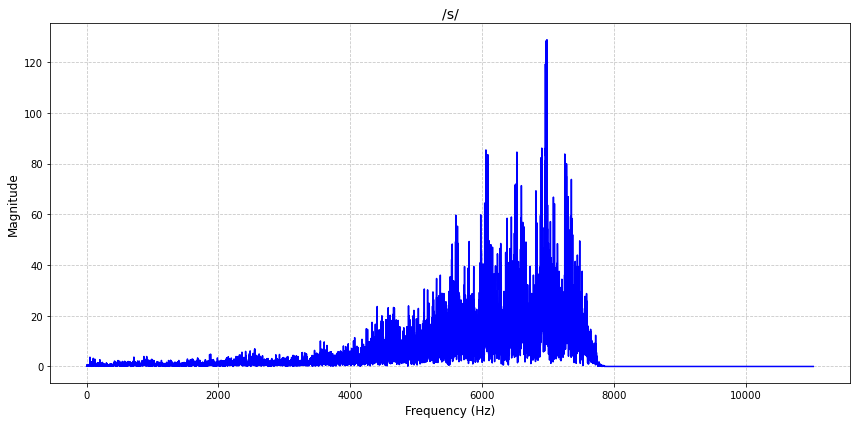

For /s/: Frequency with maximum magnitude = 6983.70 Hz


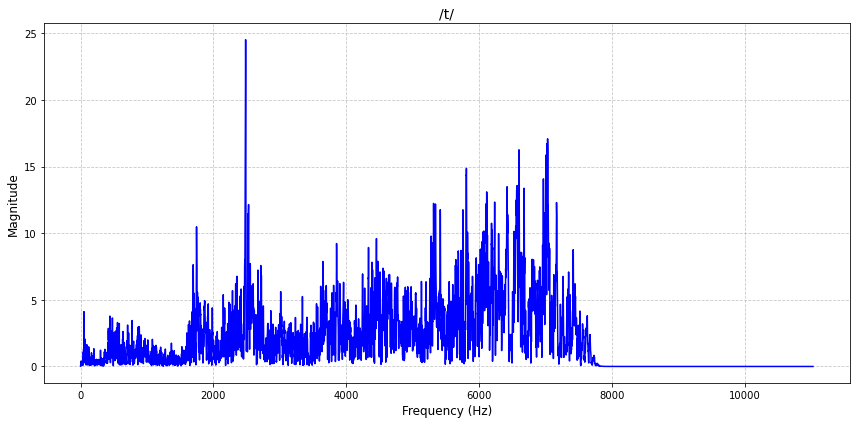

For /t/: Frequency with maximum magnitude = 2484.54 Hz


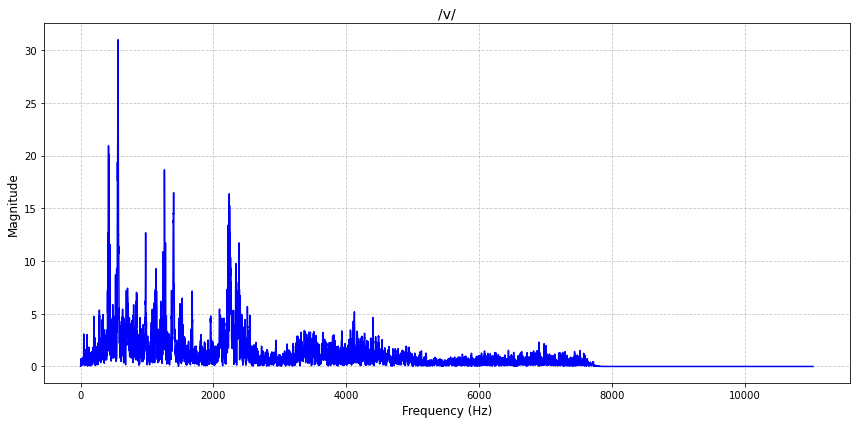

For /v/: Frequency with maximum magnitude = 564.59 Hz


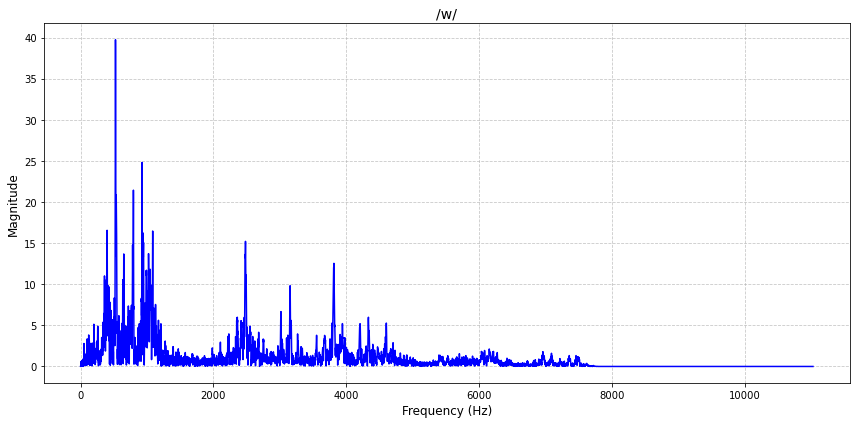

For /w/: Frequency with maximum magnitude = 525.56 Hz


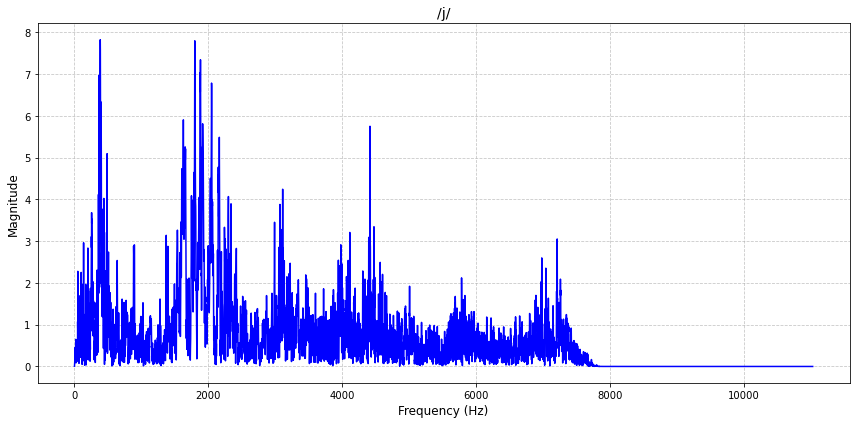

For /j/: Frequency with maximum magnitude = 384.93 Hz


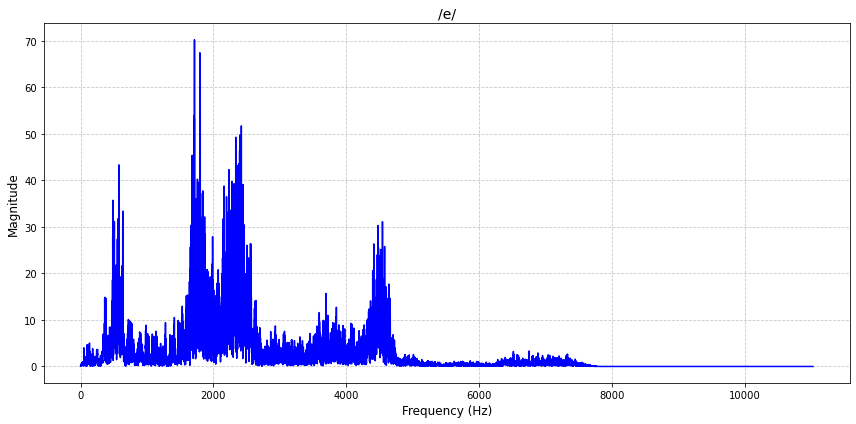

For /e/: Frequency with maximum magnitude = 1714.63 Hz


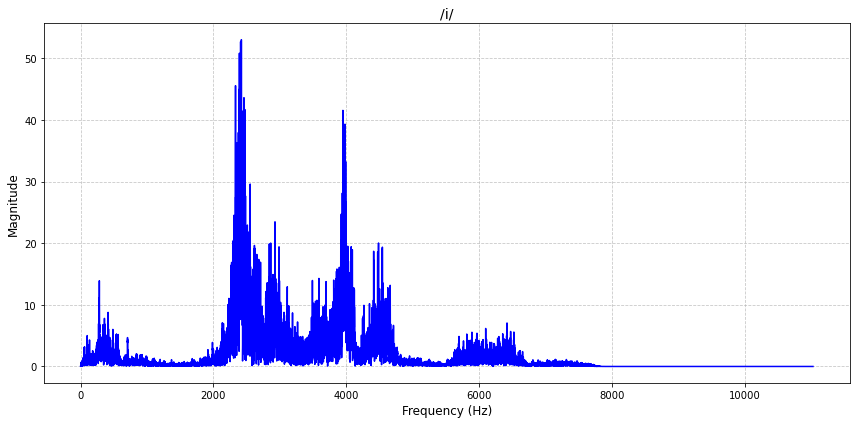

For /i/: Frequency with maximum magnitude = 2420.54 Hz


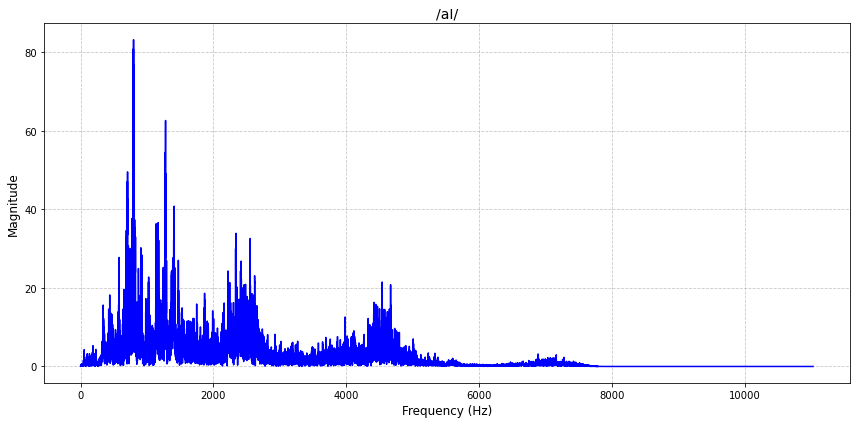

For /aI/: Frequency with maximum magnitude = 797.43 Hz


In [89]:
def plot_frequency_spectrum(X, phoneme, sr):
    # Trim signal to the nearest power of 2
    trimmed_X = trim_to_nearest_power_of_2(X)

    # Compute FFT
    ft = fft(trimmed_X)
    mag_spectrum = np.abs(ft)

    # Plot magnitude spectrum
    plt.figure(figsize=(12, 6))
    freq = np.linspace(0, sr, len(mag_spectrum))
    num_freq_bins = int(len(freq) * 0.5)

    plt.plot(freq[:num_freq_bins], mag_spectrum[:num_freq_bins], color='blue', linewidth=1.5)
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.title(phoneme, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Find frequency with maximum magnitude
    max_freq_index = np.argmax(mag_spectrum[:num_freq_bins])
    max_freq = freq[max_freq_index]
    print(f"For {phoneme}: Frequency with maximum magnitude = {max_freq:.2f} Hz")

# Plotting
for i in range(8):
    plot_frequency_spectrum(data[i], data_name[i], sr)

# Part III : Visualizing Spectograms of the recordings

## Need for spectograms

Fourier transforms are good but there is one big issue, that is we dont know how frequency of the time-domain signal is varying over the time. What we are getting is averaged over the entire interval and we cannot make out which frequency occured when in time

for example lets take the following illustration


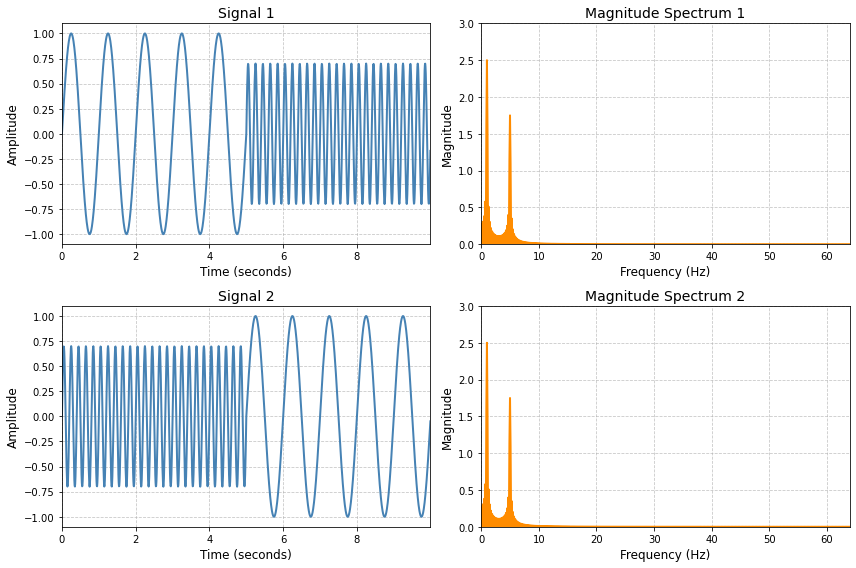

In [90]:
import matplotlib.pyplot as plt
import numpy as np

def plot_signal(t, x, title):
    plt.plot(t, x, c='steelblue', linewidth=2)
    plt.xlim([min(t), max(t)])
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)

def plot_spectrum(freq, X, title):
    plt.plot(freq, X, c='darkorange', linewidth=2)
    plt.xlim([0, max(freq)])
    plt.ylim([0, max(X) * 1.2])
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)

# Define parameters for the signals
Fs = 128  # Sampling frequency
duration = 10  # Duration of signals in seconds
omega1 = 1  # Frequency of the first signal
omega2 = 5  # Frequency of the second signal

# Calculate the number of samples
N = int(duration * Fs)

# Generate time vector
t = np.arange(N) / Fs

# Split time vector into two halves
t1 = t[:N//2]  # First half
t2 = t[N//2:]  # Second half

# Generate two sinusoidal signals with different frequencies
x1 = 1.0 * np.sin(2 * np.pi * omega1 * t1)  # First signal
x2 = 0.7 * np.sin(2 * np.pi * omega2 * t2)  # Second signal

# Concatenate the two signals to create test signals with different arrangements
x_test_1 = np.concatenate((x1, x2))  # Signal 1 (x1 followed by x2)
x_test_2 = np.concatenate((x2, x1))  # Signal 2 (x2 followed by x1)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Signal 1
plt.subplot(2, 2, 1)
plot_signal(t, x_test_1, 'Signal 1')

# Plot Magnitude Spectrum of Signal 1
plt.subplot(2, 2, 2)
X = np.abs(np.fft.fft(x_test_1)) / Fs  # Compute FFT and normalize
freq = np.fft.fftfreq(N, d=1/Fs)  # Frequency bins
X = X[:N//2]  # Take only positive frequencies
freq = freq[:N//2]
plot_spectrum(freq, X, 'Magnitude Spectrum 1')

# Plot Signal 2
plt.subplot(2, 2, 3)
plot_signal(t, x_test_2, 'Signal 2')

# Plot Magnitude Spectrum of Signal 2
plt.subplot(2, 2, 4)
X = np.abs(np.fft.fft(x_test_2)) / Fs  # Compute FFT and normalize
freq = np.fft.fftfreq(N, d=1/Fs)  # Frequency bins
X = X[:N//2]  # Take only positive frequencies
freq = freq[:N//2]
plot_spectrum(freq, X, 'Magnitude Spectrum 2')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


Notice how Signal 1 and Signal 2 are different in time domain, but Fourier transform of both signals are almost similar

## Basic Idea

Instead of considering the entire signal, the main idea of the STFT(short time FT) is to consider only a small section of the signal.

One fixes a so-called **window function**, which is a function that is nonzero for only a short period of time (defining the considered section). The original signal is then multiplied with the window function to yield a **windowed signal**. To obtain frequency information at different time instances,  one shifts the window function across time and computes a Fourier transform for each of the resulting windowed signals.

Its is important to note that STFT is also depended on the window function, there are several kinds of window funtions, one of widely used one is Hanning window. Using the rectangular window is not the always the best one, because of the sharp edge of rectangular filter it introduces ripples that is due to sharp discontinuity.

## Hanning window

The Hanning window is designed to taper the edges of a signal or data sequence to zero gradually. This tapering helps to reduce spectral leakage when performing Fourier analysis or other frequency domain operations on finite-duration signals.

The Hanning window is defined mathematically as:

\begin{eqnarray}
   \mathcal{w}[k]:= 0.54 + 0.46*\mathrm{cos}(\pi k/N) , where (-N <= k <= N )
\end{eqnarray} 



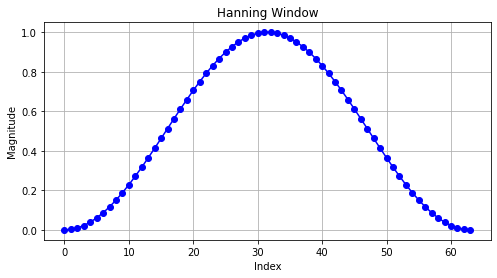

In [91]:
hanning_window = np.hanning(64)

# Plot the Hanning window
plt.figure(figsize=(8, 4))
plt.plot(hanning_window, marker='o', color='b')
plt.title('Hanning Window')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

## Discrete STFT

Let $x:[0:L-1]:=\{0,1,\ldots,L-1\}\to{\mathbb R}$ be a real-valued discrete-time (DT) signal of length $L$ obtained by equidistant sampling with respect to a fixed sampling rate $F_\mathrm{s}$ given in Hertz. Furthermore, let $w:[0:N-1]\to\mathbb{R}$ be a sampled  window function of length $N\in\mathbb{N}$.The length parameter $N$ determines the duration of the considered sections, which amounts to $N/F_\mathrm{s}$ seconds. One also introduces an additional parameter $H\in\mathbb{N}$, which is referred to as the **hop size**.  The hop size parameter is specified in samples and determines the step size in which the window is to be shifted across the signal. With regard to these parameters, the **discrete STFT** $\mathcal{X}$ of the signal $x$ is given by  

\begin{eqnarray}
   \mathcal{X}(m,k):= \sum_{n=0}^{N-1} x(n+mH)w(n)\mathrm{exp}(-2\pi ikn/N)
\end{eqnarray} 

with $m\in[0:M]$ and $k\in[0:K]$. The number $M:=\lfloor \frac{L-N}{H} \rfloor$ is the maximal frame index such that the window's time range is fully contained in the signal's time range. (We will see later some variants using padding strategies.) Furthermore, $K=N/2$ (assuming that $N$ is even) is the frequency index corresponding to the Nyquist frequency. The complex number $ \mathcal{X}(m,k)$ denotes the $k^{\mathrm{th}}$ Fourier coefficient for the $m^{\mathrm{th}}$ time frame.  Note that for each fixed time frame $m$, one obtains a **spectral vector** of size $K+1$ given by the coefficients $\mathcal{X}(m,k)$ for $k\in[0:K]$. The computation of each such spectral vector amounts to a DFT of size $N$

## Spectrogram

The **spectrogram** is a two-dimensional representation of the squared magnitude of the STFT:

\begin{eqnarray}
    \mathcal{Y}(m,k):= | \mathcal{X}(m,k)|^2.
\end{eqnarray} 

It can be visualized by means of a two-dimensional image, where the horizontal axis represents time and the vertical axis represents frequency. In this image, the spectrogram value $ \mathcal{Y}(m,k)$ is represented by the intensity or color in the image at the coordinate $(m,k)$. Note that in the discrete case, the time axis is indexed by the frame indices $m$ and the frequency axis is indexed by the frequency indices $k$.

<!-- <img src="../data/C2/FMP_C2_F09b.png" width="300px" align="middle" alt="C0"> -->

In [92]:
def stft_basic(x, w, H=8, only_positive_frequencies=False):
    """
    Compute the Short-Time Fourier Transform (STFT) of a signal using a basic implementation.

    Parameters:
    - x: array-like, input signal
    - w: array-like, analysis window (e.g., Hamming window)
    - H: int, hop size (default is 8)
    - only_positive_frequencies: bool, whether to include only positive frequencies in the output (default is False)

    Returns:
    - X: 2D array, STFT of the input signal
    """
    N = len(w)  # Length of the analysis window
    L = len(x)  # Length of the input signal
    M = np.floor((L - N) / H).astype(int) + 1  # Number of frames
    X = np.zeros((N, M), dtype='complex')  # Initialize STFT matrix

    # Compute STFT for each frame
    for m in range(M):
        # Extract current frame with the analysis window
        x_win = x[m * H:m * H + N] * w
        # Compute FFT of the windowed frame
        X_win = fft(x_win)
        # Store FFT result in the STFT matrix
        X[:, m] = X_win

    # Optionally, consider only positive frequencies
    if only_positive_frequencies:
        K = 1 + N // 2  # Number of positive frequencies
        X = X[0:K, :]  # Keep only positive frequencies

    return X

## Interpretation of Time and Frequency Indices

As for the temporal dimension, each Fourier coefficient $\mathcal{X}(m,k)$ is associated with the physical time position 

\begin{equation}
         T_\mathrm{coef}(m) := \frac{m\cdot H}{F_\mathrm{s}} seconds
\end{equation}

we will choose $H=N/2$, which is considered to be good trade-off to make between time space resolution and number of spectral coeffients which are computed again and again

As for the frequency dimension, the index $k$ of $\mathcal{X}(m,k)$ corresponds to the physical frequency

\begin{equation}
         F_\mathrm{coef}(k) := \frac{k\cdot F_\mathrm{s}}{N} Hertz
\end{equation}
 

## Plot spectograms

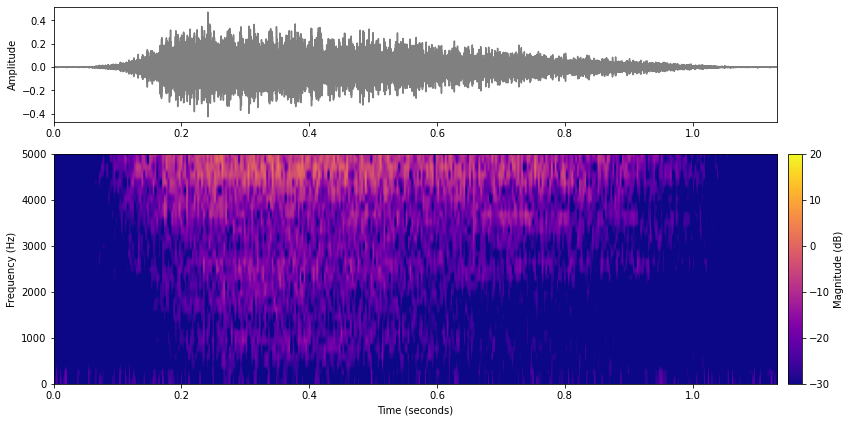

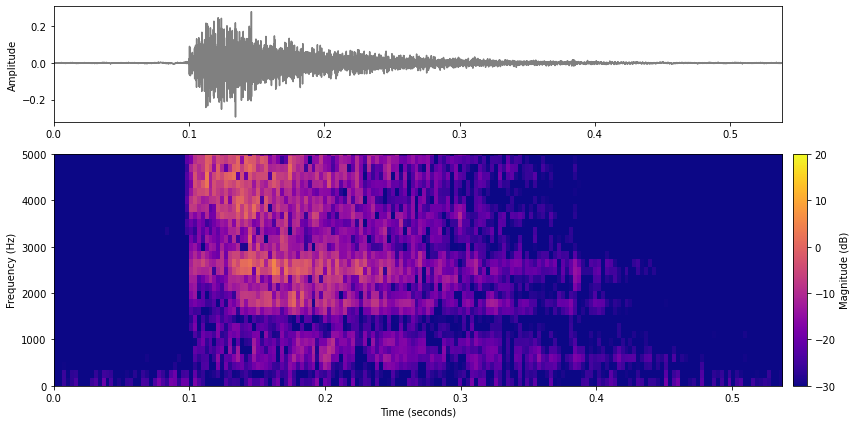

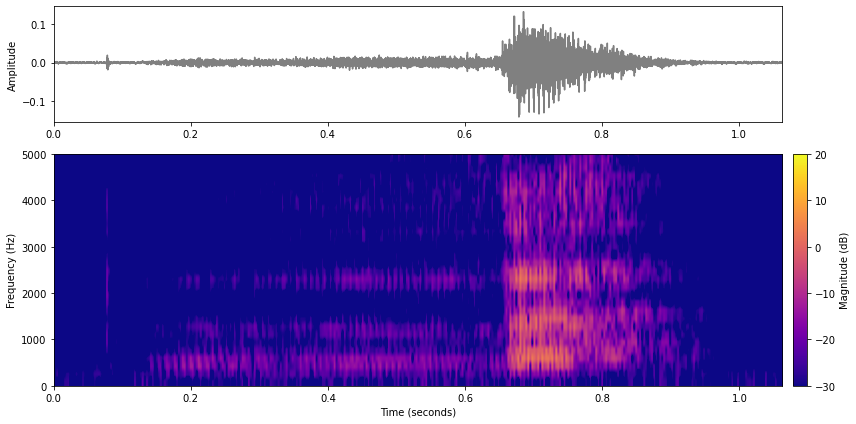

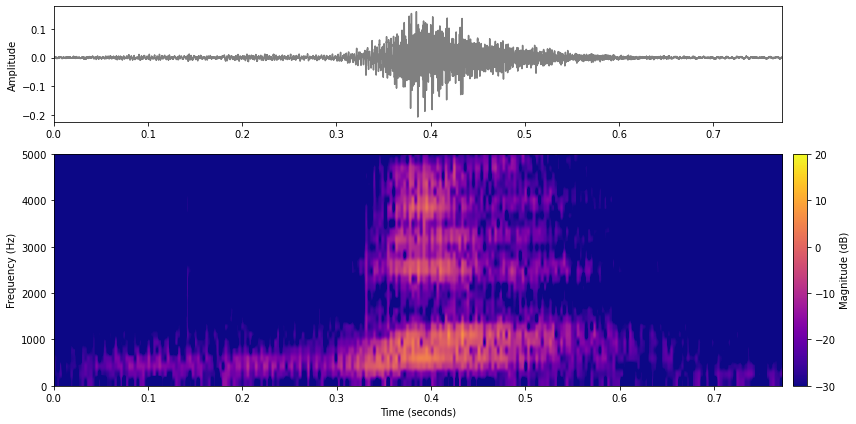

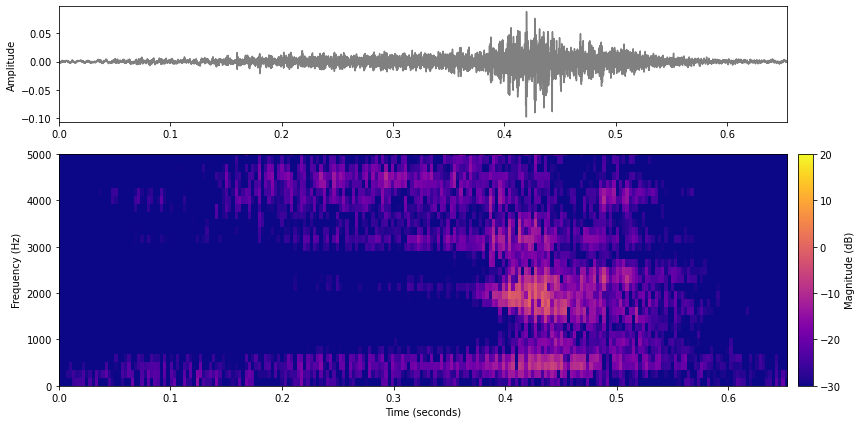

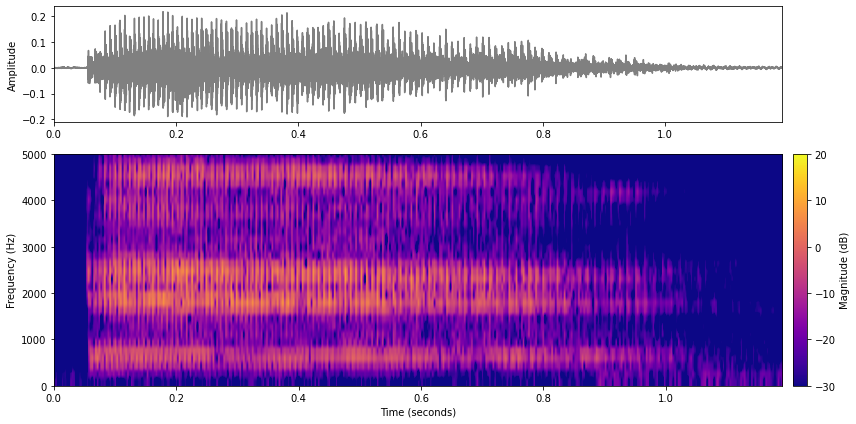

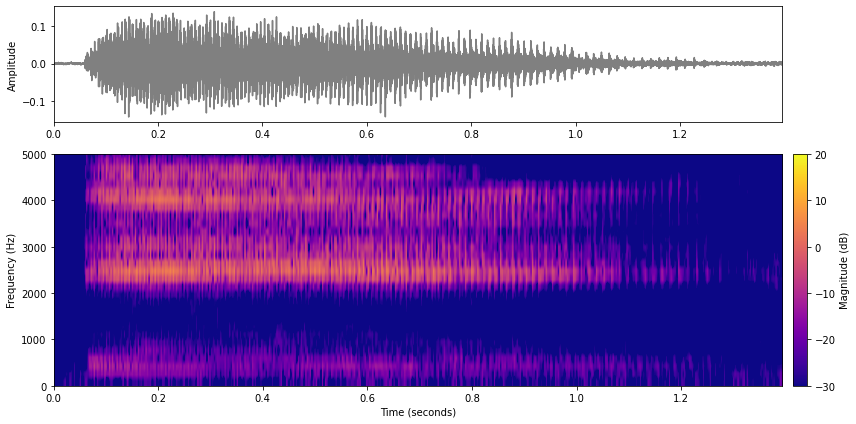

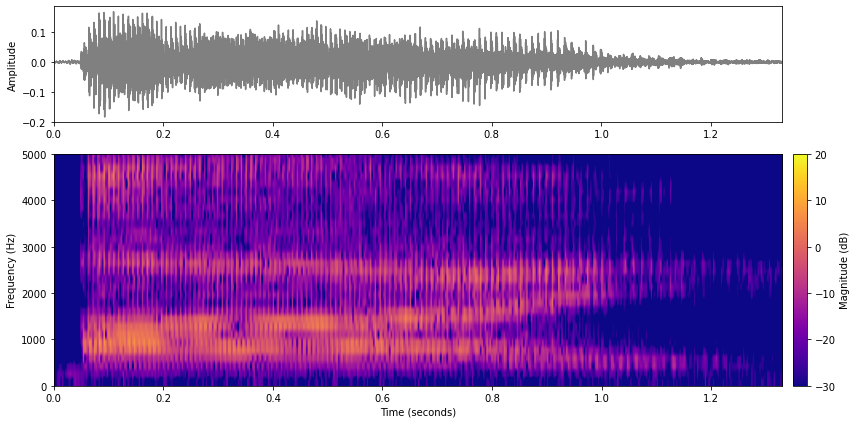

In [93]:
def plot_spectogram(x, phoneme, sr, spectrogram_color='viridis'):
    """
    Plot the spectrogram of an audio signal.

    Parameters:
    - x: array-like, input signal
    - phoneme: str, name of the phoneme
    - sr: int, sampling rate of the signal
    - spectrogram_color: str, colormap for the spectrogram (default is 'viridis')

    Returns:
    - None
    """
    Fs = sr
    
    N = 128
    H = N // 2

    w = np.hanning(N)
    X = stft_basic(x, w, H)
    Y = np.abs(X) ** 2
    eps = np.finfo(float).eps
    Y_db = 10 * np.log10(Y + eps)

    T_coef = np.arange(X.shape[1]) * H / Fs
    F_coef = np.arange(X.shape[0]) * Fs / N

    fig = plt.figure(figsize=(12, 6))  # Adjusting figure height
    plt.title(phoneme, fontsize=14)

    gs = matplotlib.gridspec.GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[100, 2])  # Adjusting grid spec
    ax1, ax2, ax5, ax6 = [plt.subplot(gs[i]) for i in range(4)]  # Adjusting subplot selection

    t = np.arange(len(x)) / Fs
    ax1.plot(t, x, c='gray')
    ax1.set_xlim([min(t), max(t)])
    ax1.set_ylabel('Amplitude')  # Adjusting y-axis label

    ax2.set_visible(False)  # Hiding unused subplot

    left = min(T_coef)
    right = max(T_coef) + N / Fs
    lower = min(F_coef)
    upper = max(F_coef)

    # Plotting Magnitude (dB)
    im2 = ax5.imshow(Y_db, origin='lower', aspect='auto', cmap=spectrogram_color, 
                     extent=[left, right, lower, upper])
    im2.set_clim([-30, 20])
    ax5.set_ylim([0, 5000])
    ax5.set_xlabel('Time (seconds)')
    ax5.set_ylabel('Frequency (Hz)')

    cbar = fig.colorbar(im2, cax=ax6)
    ax6.set_ylabel('Magnitude (dB)', rotation=90)

    plt.tight_layout()

# Loop to plot only the "Magnitude (dB)" plot
for i in range(8):
    plot_spectogram(data[i], data_name[i], sr, spectrogram_color='plasma')
